>Impact of Covid on Finance
>> Investment Analysis (Real Estate, etc)

>> Angela Infanta R. -101852

>> Vishadh .S -101855

In [ ]:
import pandas as pd
import pandas.util.testing as tm
from statsmodels.tsa.api import SimpleExpSmoothing

In [ ]:
dataset = pd.read_csv('/content/sample_data/demo_prj_original.csv')
dataset

,LOCATION,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,AUT,TOT,AGRWTH,M,2017-11,2.263780
1,AUT,TOT,AGRWTH,M,2017-12,2.154750
2,AUT,TOT,AGRWTH,M,2018-01,1.768173
3,AUT,TOT,AGRWTH,M,2018-02,1.762977
4,AUT,TOT,AGRWTH,M,2018-03,1.851852
...,...,...,...,...,...,...
1956,EU27_2020,TOT,AGRWTH,M,2020-08,0.400000
1957,EU27_2020,TOT,AGRWTH,M,2020-09,0.200000
1958,EU27_2020,TOT,AGRWTH,M,2020-10,0.200000
1959,EU27_2020,TOT,AGRWTH,M,2020-11,0.200000


In [ ]:
# Remove two columns name is SUBJECT	MEASURE	FREQUENCY	
df = dataset.drop(['SUBJECT',	'MEASURE',	'FREQUENCY'], axis = 1)
df_new = df[df['LOCATION'] == 'IND']
df_new.head()

,LOCATION,TIME,Value
1241,IND,2017-11,3.971119
1242,IND,2017-12,4.000000
1243,IND,2018-01,5.109489
1244,IND,2018-02,4.744525
1245,IND,2018-03,4.363636


In [ ]:
df = df_new["Value"].tolist()
df
#df = [ 3.971119,4,5.109489,4.744525,4.363636,3.971119,3.956835,3.928571,5.614035,5.614035,5.614035,5.226481,4.861111,5.244755,6.597222,6.968641,7.665505,8.333333,8.650519,8.591065,5.980066,6.312293,6.976744,7.615894,8.609271,9.634551,7.491857,6.840391,5.501618,5.448718,5.095541,5.063291,5.329154,5.625,5.636574,5.902163,5.284787, 3.686636,]

[3.9711190000000003,
 4.0,
 5.109489,
 4.744525,
 4.363636,
 3.9711190000000003,
 3.956835,
 3.928571,
 5.614034999999999,
 5.614034999999999,
 5.614034999999999,
 5.226481,
 4.861111,
 5.2447550000000005,
 6.597222,
 6.968641000000001,
 7.6655050000000005,
 8.333333,
 8.650519000000001,
 8.591064999999999,
 5.980066000000001,
 6.312293,
 6.976744,
 7.615894,
 8.609271000000001,
 9.634551,
 7.491857,
 6.840391,
 5.501618,
 5.448718,
 5.095541000000001,
 5.063291,
 5.329154,
 5.625,
 5.6365739999999995,
 5.902163,
 5.284787000000001,
 3.686636]

In [ ]:
index= pd.date_range(start='2017-11', end='2021-01', freq='M')
data = pd.Series(df, index)
print(data)

2017-11-30    3.971119
2017-12-31    4.000000
2018-01-31    5.109489
2018-02-28    4.744525
2018-03-31    4.363636
2018-04-30    3.971119
2018-05-31    3.956835
2018-06-30    3.928571
2018-07-31    5.614035
2018-08-31    5.614035
2018-09-30    5.614035
2018-10-31    5.226481
2018-11-30    4.861111
2018-12-31    5.244755
2019-01-31    6.597222
2019-02-28    6.968641
2019-03-31    7.665505
2019-04-30    8.333333
2019-05-31    8.650519
2019-06-30    8.591065
2019-07-31    5.980066
2019-08-31    6.312293
2019-09-30    6.976744
2019-10-31    7.615894
2019-11-30    8.609271
2019-12-31    9.634551
2020-01-31    7.491857
2020-02-29    6.840391
2020-03-31    5.501618
2020-04-30    5.448718
2020-05-31    5.095541
2020-06-30    5.063291
2020-07-31    5.329154
2020-08-31    5.625000
2020-09-30    5.636574
2020-10-31    5.902163
2020-11-30    5.284787
2020-12-31    3.686636
Freq: M, dtype: float64


Text(0.5, 1.0, 'India Share Market Prices')

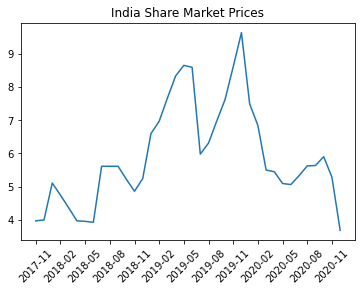

In [ ]:
import matplotlib.pyplot as plt
x = df_new["TIME"]
y = df_new["Value"]
plt.plot(x, y)
plt. xticks(rotation=45)
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::3])
plt.title("India Share Market Prices")

In [ ]:
#First Instance
ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(3).rename('alpha=0.2')


In [ ]:
#Second Instance
ins2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(3).rename('alpha=0.8')


In [ ]:

#Third Instance
ins3 = SimpleExpSmoothing(data).fit()
ins_cast3 = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])


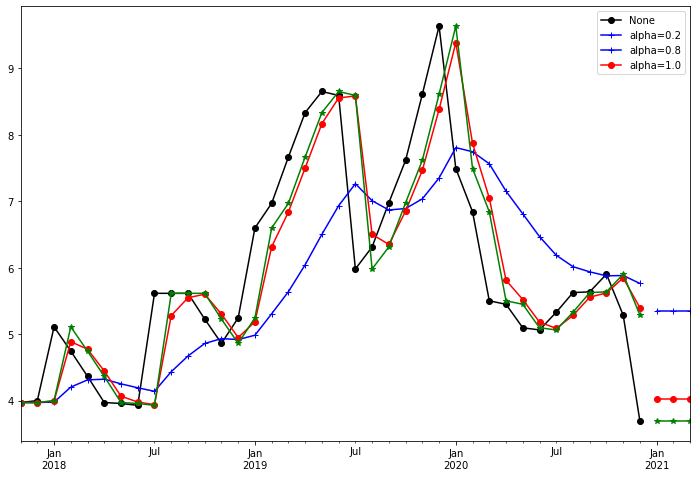

In [ ]:
#After creating model we will visualize the plot
ax = data.plot(marker='o', color='black', figsize=(12,8), legend=True)

#Plot for alpha =0.2
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')
#Plot for alpha = 0.8
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')

plt.show()